Project scope<br>
-Identify animals that have conservation statuses and idenitfy which parks they are at<br>
-look into national parks with greater amounts of endangered species<br>
    -events at those parks that could have influenced the greater amounts

In [148]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

#checking data
obs = pd.read_csv('observations.csv')
print(obs.head(10))
print(obs.columns,'\n')

print(obs.dtypes,'\n')

print('Column counts for observation dataset')
print(obs.count(),'\n')

print('NaN counts for observation dataset')
print(obs.isna().sum(),'\n')

print('Amount of unique scientific_names observed: ' + str(obs.scientific_name.nunique()))
print('Amount of parks where observations occurred: ' + str(obs.park_name.nunique()),'\n')
print(f'Different parks where observations ocurred: {obs.park_name.unique()}','\n')



                     scientific_name                            park_name  \
0                 Vicia benghalensis  Great Smoky Mountains National Park   
1                     Neovison vison  Great Smoky Mountains National Park   
2                  Prunus subcordata               Yosemite National Park   
3               Abutilon theophrasti                  Bryce National Park   
4           Githopsis specularioides  Great Smoky Mountains National Park   
5  Elymus virginicus var. virginicus               Yosemite National Park   
6                   Spizella pusilla            Yellowstone National Park   
7                  Elymus multisetus  Great Smoky Mountains National Park   
8             Lysimachia quadrifolia               Yosemite National Park   
9         Diphyscium cumberlandianum            Yellowstone National Park   

   observations  
0            68  
1            77  
2           138  
3            84  
4            85  
5           112  
6           228  
7       

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   
5   Mammal         Odocoileus virginianus   
6   Mammal                     Sus scrofa   
7   Mammal                  Canis latrans   
8   Mammal                    Canis lupus   
9   Mammal                    Canis rufus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  
5                                  White-Tailed Deer  

C:\Users\kathleen.letkiewicz\AppData\Local\Temp\ipykernel_14724\2007917229.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45,ha='right')


<function matplotlib.pyplot.clf() -> 'None'>

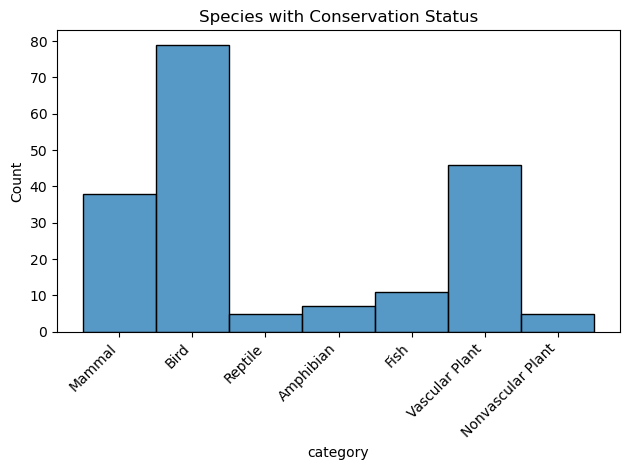

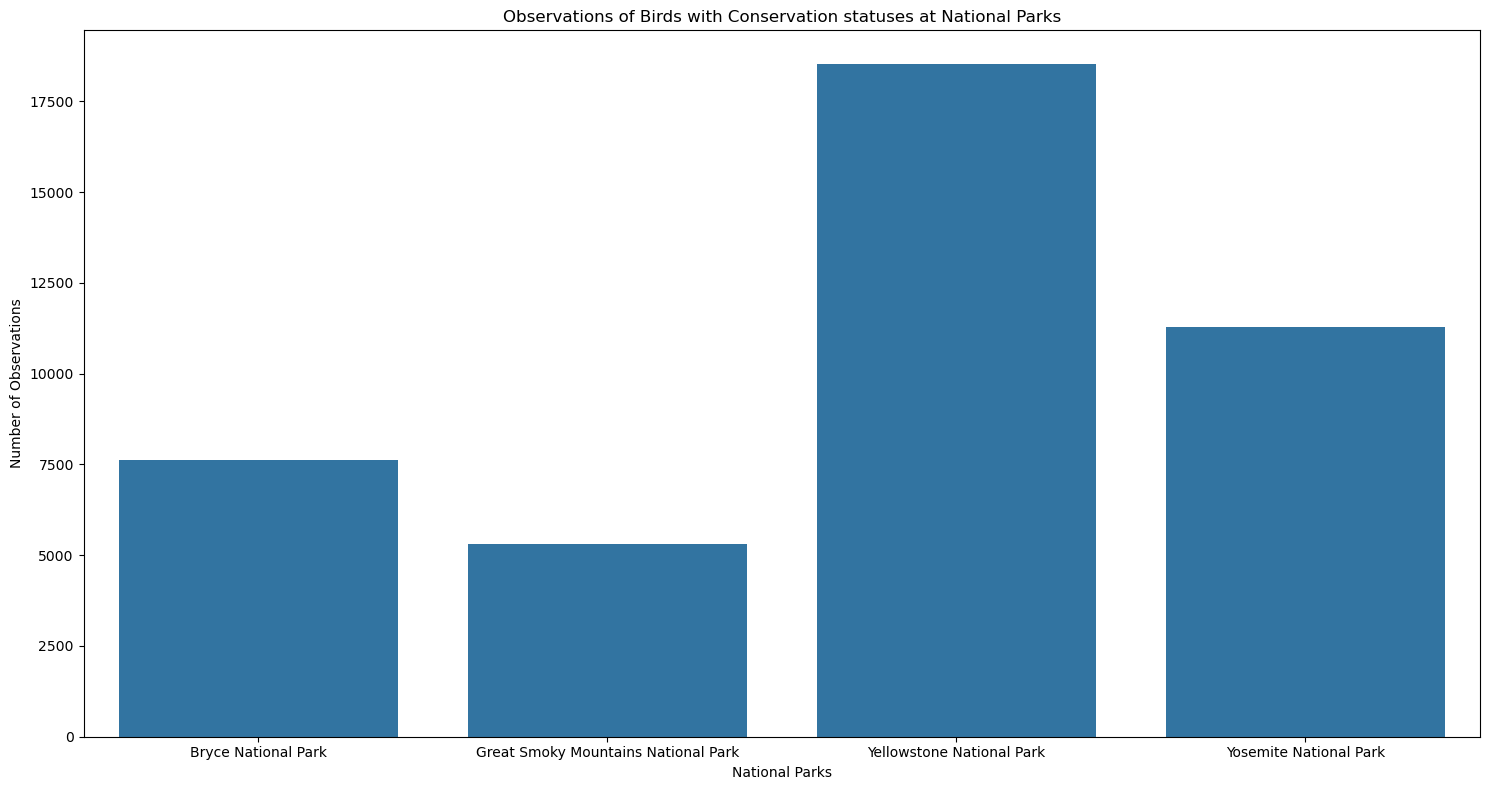

In [149]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

species = pd.read_csv('species_info.csv')
obs = pd.read_csv('observations.csv')
print(species.head(10))
print(species.columns,'\n')

print(species.dtypes,'\n')
    
print('Column counts for species dataset')
print(species.count(),'\n')

print('NaN counts for species dataset')
print(species.isna().sum(),'\n')
percent_con_status = (191/5824)*100

print('There are Conservation Statuses for ' + str(round(percent_con_status)) + '% of the data in species dataset','\n')
print('Amount of unique categories: ' + str(species.category.nunique()))
print('Amount of unique scientific names: ' + str(species.scientific_name.nunique()))
print('Amount of unique common names: ' + str(species.common_names.nunique()))
print('Amount of unique conservation statuses: ' + str(species.conservation_status.nunique()),'\n')

print(f'Different categories: {species.category.unique()}')
print(f'Different conservation statuses: {species.conservation_status.unique()}','\n')

print('Counts per Category:')
print(species.groupby('category').size(),'\n')

#print('Counts per Conservation_status:')
#print(species.groupby('conservation_status').size(),'\n')

#replacing NaN values in conservation status column with not evaluated or no concern
species.fillna('No_info_or_No_concern', inplace = True)
print('Counts per Conservation_status:')
print(species.groupby('conservation_status').size(),'\n')

#creating new dataset to show only those with a conservation status
conservation_species = species[species.conservation_status != 'No_info_or_No_concern'] 

#new column with just species that have a conservation status
species['concerned_species'] = species.conservation_status != 'No_info_or_No_concern'

#visualization of categories of animals with a conservation status
ax = sns.histplot(data=conservation_species, x='category')
plt.title('Species with Conservation Status')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45,ha='right')
plt.tight_layout()
plt.show
plt.clf

#new dataset of just birds with conservation status
concerned_birds = conservation_species[conservation_species.category == 'Bird']
print('Column count for concerned_birds dataset')
print(concerned_birds.count(),'\n')

#merging dataframes by matching scientific names
print('Merged Species and Observation Dataset on Scientific Name for those birds with conservation statuses','\n')
concerned_birds_obs = pd.merge(concerned_birds, obs, on='scientific_name', how = 'inner')
print(concerned_birds_obs.head(10),'\n')
cbo = concerned_birds_obs

print('Column count for cbo dataset')
print(cbo.count(),'\n')
print(cbo.dtypes,'\n')

#summing observations of birds with conservation status by park

cbo_count = cbo.groupby('park_name').observations.sum().reset_index()
print('Count of observations of Birds with conservation status per park: ','\n')
print(cbo_count)

#visualization of parks with concerned bird populations
plt.figure(figsize=(15,8))
ax2 = sns.barplot(x=cbo_count.park_name, y=cbo_count.observations)
plt.title('Observations of Birds with Conservation statuses at National Parks')
ax2.set_xticks(range(len(cbo_count['park_name'])))
ax2.set_xticklabels(cbo_count['park_name'])
#ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45,ha='left')
plt.xlabel('National Parks')
plt.ylabel('Number of Observations')
plt.tight_layout()
plt.show
plt.clf


Conclusions / Obersvations:<br>
- There were many NaN values in the conservation status column of the species dataset which I interpreted as there being no data or there was no concern with that specific [animal](https://livingrainforest.org/learning-resources/iucn-conservation-status-explained#:~:text=When%20there%20is%20not%20enough,evaluated%20against%20the%20above%20criteria.).
- This lack of data in the conservation status column makes the Chi-square test irrelevant as there is no certainty in why the data is missing. As there is no certainty, I do not think it would be a good idea to derive any correlation between variable in the event that an interpretation of the uncertainty is incorrect.
- In regards to performing tests to conclucde whether species were any relation between species and their conservation status we only had conservation statuses for 3% of the entire dataset. As there is a general rule for there to be 50% of one variable to compare to another, the Chi-square test would not be relevant in this scenario. 
- A potential explanation of why there were more observations in Yellowstone is most likely due to it's larger area when compared to the other parks:<br>
- Yellowstone : [3471 sq.mi.](https://en.wikipedia.org/wiki/Yellowstone_National_Park)<br>
- Yosemite : [1169 sq.mi.](https://en.wikipedia.org/wiki/Yosemite_National_Park)(<br>
- Great Smoky : [800 sq.mi.](https://en.wikipedia.org/wiki/Great_Smoky_Mountains_National_Park#:~:text=The%20Great%20Smoky%20Mountains%20National%20Park%20covers%20a%20total%20of,Haywood%20Counties%20in%20North%20Carolina.)<br>
- Bryce : [56 sq.mi.](https://en.wikipedia.org/wiki/Bryce_Canyon_National_Park)<br>
- As it was more likely for birds to be listed with conservation statuses, one could surmise that with changing climates, woresning air quality is affecting birds more than other species as they are more exposed to changes in air quality than other animals.
